In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats immport pearsonr
data = Path("brfss2020.csv")
data_df = pd.read_csv(data)
data_df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA',
       '_VIRCOLN', '_SBONTIM', '_CRCREC1', '_AIDTST4'],
      dtype='object', length=279)

Null Hypothesis: There is no significant correlation between the average cups of coffee consumed and the average time of sleep in different states.

Alternate Hypothesis: There is a significant correlation between the average cups of coffee consumed and the average time of sleep in different states.

Time to clean the data. First we are going to set up the columns we want to keep for the analysis

In [3]:
columns_to_keep = ["_STATE", "IDATE", "IYEAR", "SLEPTIM1"]
sleep_df = data_df.filter(items=columns_to_keep)

Next we are going to make a dataframe for each stat in the top 10 most coffee cups per day.
Top 10 states with most coffee cups per day
1. Michigan
2. Delaware
3. West Virginia
4. Ohio
5. Nebraska
6. Arkansas
7. South Carolina
8. Kansas
9. Maine
10. Louisiana

In [4]:
michigan_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 26]
delaware_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 10]
wV_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 54]
ohio_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 39]
nebraska_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 31]
ak_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 5]
sc_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 45]
ka_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 20]
me_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 23]
la_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 22]

Now we're going to repeat the steps, but for the least amount of coffee per day.
Top 10 states with least coffee cups per day
1. Utah
2. Arizona
3. Minnesota
4. New Jersey
5. Massachusetts
6. Wisconsin
7. Hawaii
8. Georgia
9. Maryland
10. Mississippi

In [5]:
utah_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 49]
az_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 4]
minn_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 27]
nJ_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 34]
mass_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 25]
wis_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 55]
hi_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 15]
geo_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 13]
md_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 24]
miss_sleep_df = sleep_df.loc[sleep_df["_STATE"] == 28]

In [6]:
#Function to find average sleep
def mean_sleep(df, column):
    #Calculate mean for a given column, in this case sleep time
    #parameters: - df: the input dataframe
    #column: the name of the column we want the mean for
    column_mean = df[column].mean()
    return column_mean

In [7]:
#Top 10
mich_avg_sleep = mean_sleep(michigan_sleep_df, 'SLEPTIM1')
del_avg_sleep = mean_sleep(delaware_sleep_df, 'SLEPTIM1')
wV_avg_sleep = mean_sleep(wV_sleep_df, 'SLEPTIM1')
ohio_avg_sleep = mean_sleep(ohio_sleep_df, 'SLEPTIM1')
ne_avg_sleep = mean_sleep(nebraska_sleep_df, 'SLEPTIM1')
ak_avg_sleep = mean_sleep(ak_sleep_df, 'SLEPTIM1')
sc_avg_sleep = mean_sleep(sc_sleep_df, 'SLEPTIM1')
ka_avg_sleep = mean_sleep(ka_sleep_df, 'SLEPTIM1')
me_avg_sleep = mean_sleep(me_sleep_df, 'SLEPTIM1')
la_avg_sleep = mean_sleep(la_sleep_df, 'SLEPTIM1')

#Bottom 10
utah_avg_sleep = mean_sleep(utah_sleep_df, 'SLEPTIM1')
az_avg_sleep = mean_sleep(az_sleep_df, 'SLEPTIM1')
minn_avg_sleep = mean_sleep(minn_sleep_df, 'SLEPTIM1')
nJ_avg_sleep = mean_sleep(nJ_sleep_df, 'SLEPTIM1')
mass_avg_sleep = mean_sleep(mass_sleep_df, 'SLEPTIM1')
wis_avg_sleep = mean_sleep(wis_sleep_df, 'SLEPTIM1')
hi_avg_sleep = mean_sleep(hi_sleep_df, 'SLEPTIM1')
geo_avg_sleep = mean_sleep(geo_sleep_df, 'SLEPTIM1')
md_avg_sleep = mean_sleep(md_sleep_df, 'SLEPTIM1')
miss_avg_sleep = mean_sleep(miss_sleep_df, 'SLEPTIM1')

In [8]:

coffee_data = data = {
    'State': [
        'Michigan', 'Delaware', 'West Virginia', 'Ohio', 'Nebraska', 'Arkansas',
        'South Carolina', 'Kansas', 'Maine', 'Louisiana', 'Utah', 'Arizona',
        'Minnesota', 'New Jersey', 'Massachusetts', 'Wisconsin', 'Hawaii',
        'Georgia', 'Maryland', 'Mississippi'
    ],
    'Cups of Coffee': [
        2.52, 2.44, 2.35, 2.16, 2.13, 2.12, 2.12, 2.07, 2.05, 2.03,
        1.29, 1.30, 1.32, 1.45, 1.51, 1.52, 1.52, 1.54, 1.57, 1.58
    ]
}
coffee_df = pd.DataFrame(coffee_data)
state_mapping = {26: 'Michigan', 10: 'Delaware', 54: 'West Virginia', 39: 'Ohio', 31: 'Nebraska', 5: 'Arkansas', 45: 'South Carolina', 20: 'Kansas', 23: 'Maine', 22: 'Louisiana', 
                49: 'Utah', 4: 'Arizona', 27: 'Minnesota', 34: 'New Jersey', 25: "Massachusetts", 55: "Wisconsin", 15: 'Hawaii', 13: "Georgia", 24: "Maryland", 28: "Mississippi"}
dfs = [michigan_sleep_df, delaware_sleep_df, wV_sleep_df, ohio_sleep_df, nebraska_sleep_df, ak_sleep_df, sc_sleep_df, ka_sleep_df, la_sleep_df, 
       utah_sleep_df, az_sleep_df, minn_sleep_df, nJ_sleep_df, mass_sleep_df, wis_sleep_df, hi_sleep_df, geo_sleep_df, md_sleep_df, miss_sleep_df]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df['_STATE'] = combined_df['_STATE'].replace(state_mapping)
combined_df = combined_df.rename(columns={'_STATE': 'State', 'IDATE':'Date','IYEAR':'Year', 'SLEPTIM1':'Sleep Time'})
merged_df = pd.merge(combined_df, coffee_df, on='State')
merged_df["Sleep Time"].describe()
#Noticing potential outliers when looking at the data, so going to fix




count    169515.000000
mean          7.899590
std           7.787767
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          99.000000
Name: Sleep Time, dtype: float64

In [9]:
#Setting up test for outliers
q1 = merged_df["Sleep Time"].quantile(0.25)
q3 = merged_df["Sleep Time"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
#getting rid of outliers
merged_df = merged_df[merged_df["Sleep Time"].between(lower_bound, upper_bound)]
merged_df["Sleep Time"].describe()
#There that looks better

count    165038.000000
mean          7.046553
std           1.250172
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: Sleep Time, dtype: float64

T Statistic: 44.43784243695134
P-value: 7.424251262648384e-34
The correlation is statistically significant.
The r-value is: 0.14371332329726605


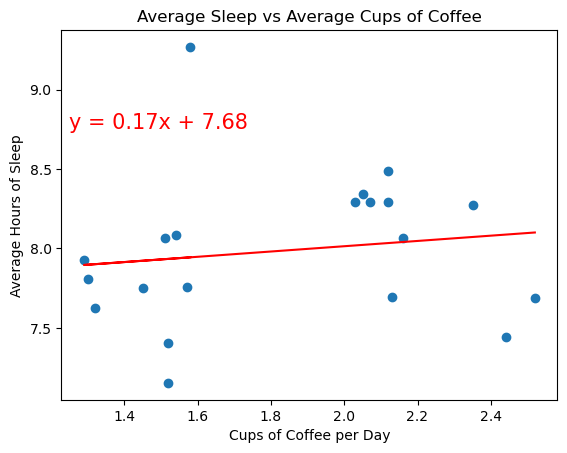

In [11]:
#Making a df of mean sleep time with coffee cups merged
means = [mich_avg_sleep, del_avg_sleep, wV_avg_sleep, ohio_avg_sleep, ne_avg_sleep,ak_avg_sleep, sc_avg_sleep, ak_avg_sleep, me_avg_sleep, la_avg_sleep,
         utah_avg_sleep, az_avg_sleep,minn_avg_sleep, nJ_avg_sleep, mass_avg_sleep, wis_avg_sleep, hi_avg_sleep, geo_avg_sleep, md_avg_sleep, miss_avg_sleep]
coffee_df["Average Sleep"] = means
#Doing a T test against the coffee data because I want to compare the means
#of these two groups and check for significance
t_statistic, p_value = stats.ttest_ind(coffee_df["Average Sleep"], coffee_df["Cups of Coffee"], equal_var=False)
print(f"T Statistic: {t_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

#Plotting cups of coffee against average sleep
(slope, intercept, rvalue, pvalue, stderr) = linregress(coffee_df["Cups of Coffee"], coffee_df["Average Sleep"])
regress_vals = coffee_df["Cups of Coffee"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is: {rvalue}")
plt.scatter(coffee_df["Cups of Coffee"], coffee_df["Average Sleep"])
plt.plot(coffee_df["Cups of Coffee"], regress_vals, "-r")
plt.annotate(line_eq,(1.25,8.75),fontsize=15,color="red")
plt.title("Average Sleep vs Average Cups of Coffee")
plt.xlabel("Cups of Coffee per Day")
plt.ylabel("Average Hours of Sleep")
plt.show()

The p value is very small and suggests strong evidence against the null hypothesis. This means the observed result is highly unlikely to occur by chance, which supports the rejection of the null hypothesis. We can use the r value to measure the strength and direction of the linear relationship between the averages cups of coffee and average time of sleep. The r value of about 0.123467 suggests a very weak positive linear correlation. The correlation is positive, but the strength of the correlation is very small.

Overall the t statistic and p value together suggest that the result is significant, that is unlikely due to random chance, and the r value suggest a positive, but very weak trend in the data. 

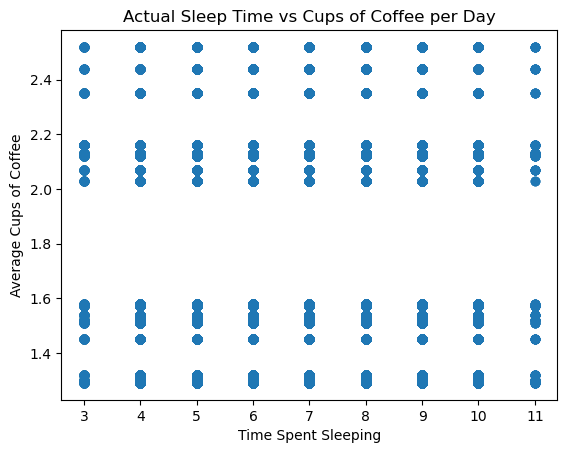

[2.52 2.44 2.35 2.16 2.13 2.12 2.07 2.03 1.29 1.3  1.32 1.45 1.51 1.52
 1.54 1.57 1.58]


In [12]:
plt.scatter(merged_df["Sleep Time"], merged_df["Cups of Coffee"])
plt.xlabel("Time Spent Sleeping")
plt.ylabel("Average Cups of Coffee")
plt.title("Actual Sleep Time vs Cups of Coffee per Day")
plt.show()
print(merged_df["Cups of Coffee"].unique())

In [13]:
#Calculating correlation coefficient and p-value using pearsonr function

correlation_coefficient, p_val = pearsonr(merged_df["Sleep Time"], merged_df["Cups of Coffee"])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_val}")
alpha = 0.05
if p_val < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")
plt.ylim(0, 40000)
plt.xlim(0,12)
plt.hist(merged_df["Sleep Time"], alpha=.5, label="Average Sleep", color='purple')
plt.hist(merged_df["Cups of Coffee"], alpha=.5, label="Cups of Coffee", color= 'green')
plt.xlabel("Hours of Sleep/ Cups")
plt.ylabel("Frequency")
plt.legend()
plt.show()
#Calculating correlation coefficient and p value using pearsonr function

NameError: name 'pearsonr' is not defined

While the P-value indicates a statistically significant correlation, the actual correlation is very weak, since our correlation coefficient is close to 0. This suggests that there is evidence of a relationship between sleep time and cups of coffee, however the strength of the relationship is not practically significant

In [ ]:
spear_man_co = spearmanr(merged_df["Sleep Time"], merged_df["Cups of Coffee"]).correlation
spear_man_co
print(len(merged_df["State"]))

NameError: name 'spearmanr' is not defined

The spearman rank correlation coefficient measures the strength and direction of the monotonic relationship between two variables. The spearman correlation coefficient suggest a very weak monotonic relationship between sleep time and cups of coffee. The (-) value indicates that as sleep time increases cups of coffee decreases. However, the value is close to zero which means the relationship is very weak

In [ ]:
plt.title("Coffee Consumption and Sleep by State")
plt.xlabel("State")
plt.ylabel("Sleep")
plt.xticks(rotation = 90)
plt.bar(merged_df["State"], merged_df["Sleep Time"], color = "yellow", label = "Sleep Time")
plt.bar(merged_df["State"], merged_df["Cups of Coffee"], color = 'purple', label = "Cups of Coffee")
plt.legend()
plt.show()

KeyboardInterrupt: 